# Task on Empathy Emotion and Personality Detection in Interactions: Emotion Label Prediction (EMO) 

#### Importing Required Libraries

In [1]:
import re
import string  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Its
[nltk_data]     Me\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Its
[nltk_data]     Me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Its
[nltk_data]     Me\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Its
[nltk_data]     Me\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# Loading datasets
train_df = pd.read_csv(r"C:\Users\Its Me\Desktop\NLP\train_emo.csv")
test_df = pd.read_csv(r"C:\Users\Its Me\Desktop\NLP\test_emo.csv")


In [4]:
train_df.head()

,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,6.5,6,4.857,2,3.429,5,1,train,1,Hope/Sadness
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,5.5,4.5,3.429,2.857,2.857,2.714,1,train,2,Anger
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,6.75,7,4.643,2.0715,4.143,4.643,1,train,4,Sadness
3,6,213,It is so sad that someone who had such an amaz...,6.166667,6.625,16,2,5,1,28,...,4.5,3.5,5,4.143,4.857,5,1,train,5,Sadness
4,8,213,"From reading the article, it looks like the wo...",6.833333,1.000,30,1,6,3,37,...,6.5,6,4.857,2,3.429,5,1,train,7,Neutral


In [5]:
train_df.shape


(792, 24)

In [6]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   conversation_id                792 non-null    int64  
 1   article_id                     792 non-null    int64  
 2   essay                          792 non-null    object 
 3   empathy                        792 non-null    float64
 4   distress                       792 non-null    float64
 5   speaker_id                     792 non-null    int64  
 6   gender                         792 non-null    object 
 7   education                      792 non-null    object 
 8   race                           792 non-null    object 
 9   age                            792 non-null    object 
 10  income                         792 non-null    object 
 11  personality_conscientiousness  792 non-null    object 
 12  personality_openess            792 non-null    obj

In [7]:
train_df.dtypes


conversation_id                    int64
article_id                         int64
essay                             object
empathy                          float64
distress                         float64
speaker_id                         int64
gender                            object
education                         object
race                              object
age                               object
income                            object
personality_conscientiousness     object
personality_openess               object
personality_extraversion          object
personality_agreeableness         object
personality_stability             object
iri_perspective_taking            object
iri_personal_distress             object
iri_fantasy                       object
iri_empathatic_concern            object
speaker_number                     int64
split                             object
essay_id                           int64
emotion                           object
dtype: object

In [8]:
 train_df.isnull().sum()

conversation_id                  0
article_id                       0
essay                            0
empathy                          0
distress                         0
speaker_id                       0
gender                           0
education                        0
race                             0
age                              0
income                           0
personality_conscientiousness    0
personality_openess              0
personality_extraversion         0
personality_agreeableness        0
personality_stability            0
iri_perspective_taking           0
iri_personal_distress            0
iri_fantasy                      0
iri_empathatic_concern           0
speaker_number                   0
split                            0
essay_id                         0
emotion                          0
dtype: int64

In [9]:
# Handling with Duplicates
train_df.drop_duplicates(inplace=True)
train_df.head()

,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,6.5,6,4.857,2,3.429,5,1,train,1,Hope/Sadness
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,5.5,4.5,3.429,2.857,2.857,2.714,1,train,2,Anger
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,6.75,7,4.643,2.0715,4.143,4.643,1,train,4,Sadness
3,6,213,It is so sad that someone who had such an amaz...,6.166667,6.625,16,2,5,1,28,...,4.5,3.5,5,4.143,4.857,5,1,train,5,Sadness
4,8,213,"From reading the article, it looks like the wo...",6.833333,1.000,30,1,6,3,37,...,6.5,6,4.857,2,3.429,5,1,train,7,Neutral


In [10]:
train_df['emotion'].value_counts()

emotion
Sadness                  297
Neutral                  202
Anger                     67
Disgust                   44
Anger/Disgust             28
Disgust/Sadness           18
Neutral/Sadness           18
Fear/Sadness              16
Hope/Sadness              15
Anger/Sadness             14
Fear                      10
Hope                      10
Surprise                   9
Anger/Neutral              8
Joy                        5
Hope/Neutral               4
Disgust/Surprise           4
Anger/Surprise             3
Joy/Sadness                3
Disgust/Neutral            3
Fear/Neutral               2
Neutral/Surprise           2
Disgust/Fear               2
Fear/Hope                  2
Joy/Neutral                1
Anger/Joy                  1
Anger/Disgust/Sadness      1
Anger/Fear                 1
Sadness/Surprise           1
Anger/Hope                 1
Name: count, dtype: int64

In [11]:
# To analyze text Length in Essays

train_df["text_length"] = train_df["essay"].apply(lambda x: len(x.split()))
train_df["text_length"].describe()

count    792.000000
mean      77.840909
std       23.556371
min       39.000000
25%       62.000000
50%       68.000000
75%       87.000000
max      161.000000
Name: text_length, dtype: float64

In [12]:
# Defining Text Preprocessing Function to handle NaN values and to convert the text to lowercase, Remove punctuation, Remove extra spaces
def clean_text(text):
    if pd.isna(text): 
        return ""
    text = text.lower()
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  
    text = re.sub(r"<.*?>", "", text)  
    text = re.sub(r"\d+", "", text)  
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\s+", " ", text).strip() 
    return text

In [13]:
# Applying text cleaning
train_df["clean_essay"] = train_df["essay"].apply(clean_text)

In [14]:
train_df.head()

,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion,text_length,clean_essay
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,4.857,2,3.429,5,1,train,1,Hope/Sadness,87,it breaks my heart to see people living in tho...
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,3.429,2.857,2.857,2.714,1,train,2,Anger,63,i wonder why there arent more people trying to...
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,4.643,2.0715,4.143,4.643,1,train,4,Sadness,69,after reading the article you cant help but fe...
3,6,213,It is so sad that someone who had such an amaz...,6.166667,6.625,16,2,5,1,28,...,5,4.143,4.857,5,1,train,5,Sadness,67,it is so sad that someone who had such an amaz...
4,8,213,"From reading the article, it looks like the wo...",6.833333,1.000,30,1,6,3,37,...,4.857,2,3.429,5,1,train,7,Neutral,62,from reading the article it looks like the wor...


#### Exploratory Data Analysis (EDA)


In [15]:
print(train_df.columns) 

Index(['conversation_id', 'article_id', 'essay', 'empathy', 'distress',
       'speaker_id', 'gender', 'education', 'race', 'age', 'income',
       'personality_conscientiousness', 'personality_openess',
       'personality_extraversion', 'personality_agreeableness',
       'personality_stability', 'iri_perspective_taking',
       'iri_personal_distress', 'iri_fantasy', 'iri_empathatic_concern',
       'speaker_number', 'split', 'essay_id', 'emotion', 'text_length',
       'clean_essay'],
      dtype='object')


In [16]:
print(train_df["emotion"].value_counts()) 


emotion
Sadness                  297
Neutral                  202
Anger                     67
Disgust                   44
Anger/Disgust             28
Disgust/Sadness           18
Neutral/Sadness           18
Fear/Sadness              16
Hope/Sadness              15
Anger/Sadness             14
Fear                      10
Hope                      10
Surprise                   9
Anger/Neutral              8
Joy                        5
Hope/Neutral               4
Disgust/Surprise           4
Anger/Surprise             3
Joy/Sadness                3
Disgust/Neutral            3
Fear/Neutral               2
Neutral/Surprise           2
Disgust/Fear               2
Fear/Hope                  2
Joy/Neutral                1
Anger/Joy                  1
Anger/Disgust/Sadness      1
Anger/Fear                 1
Sadness/Surprise           1
Anger/Hope                 1
Name: count, dtype: int64


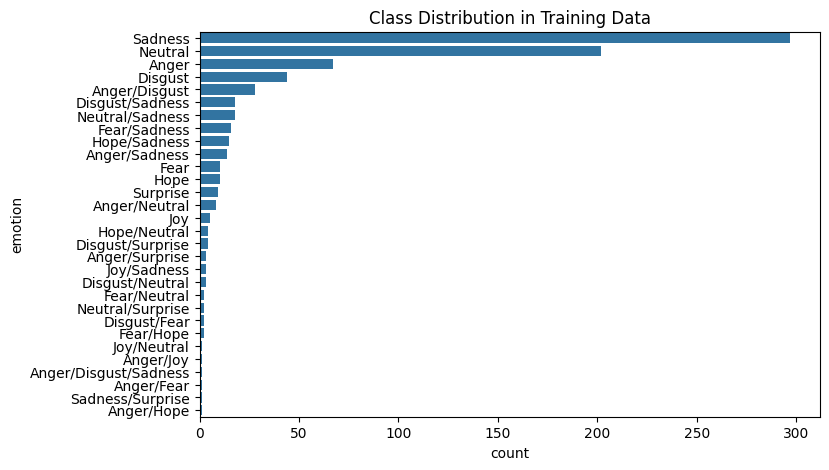

In [17]:
#Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y=train_df["emotion"], order=train_df["emotion"].value_counts().index)
plt.title("Class Distribution in Training Data")
plt.show()

###### Key Observations from The Emotion Distribution here is imbalanced Dataset "Sadness" (297) and "Neutral" (202) dominate the dataset. Rare classes like "Anger/Hope" or "Joy/Neutral" appear only once or twice. And Multi-label Emotions for example some samples have single emotions (e.g., "Fear", "Joy"), while others have combinations (e.g., "Anger/Disgust", "Sadness/Surprise"). To balance this imbalanced distribution now converting Multi-Label Emotions into a Standard Format for example, considering mapping mixed emotions to their dominant emotion (e.g., "Anger/Sadness" → "Sadness").


In [18]:
# Defining the dominant emotion mapping function
def get_dominant_emotion(emotion):
    return emotion.split('/')[0]  # Take the first emotion as the dominant one

# Apply the function to convert mixed emotions into a single class
train_df["dominant_emotion"] = train_df["emotion"].apply(get_dominant_emotion)

print(train_df["dominant_emotion"].value_counts())

dominant_emotion
Sadness     298
Neutral     222
Anger       124
Disgust      71
Fear         30
Hope         29
Joy           9
Surprise      9
Name: count, dtype: int64


In [19]:
train_df.head()

,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,iri_personal_distress,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion,text_length,clean_essay,dominant_emotion
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,2,3.429,5,1,train,1,Hope/Sadness,87,it breaks my heart to see people living in tho...,Hope
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,2.857,2.857,2.714,1,train,2,Anger,63,i wonder why there arent more people trying to...,Anger
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,2.0715,4.143,4.643,1,train,4,Sadness,69,after reading the article you cant help but fe...,Sadness
3,6,213,It is so sad that someone who had such an amaz...,6.166667,6.625,16,2,5,1,28,...,4.143,4.857,5,1,train,5,Sadness,67,it is so sad that someone who had such an amaz...,Sadness
4,8,213,"From reading the article, it looks like the wo...",6.833333,1.000,30,1,6,3,37,...,2,3.429,5,1,train,7,Neutral,62,from reading the article it looks like the wor...,Neutral


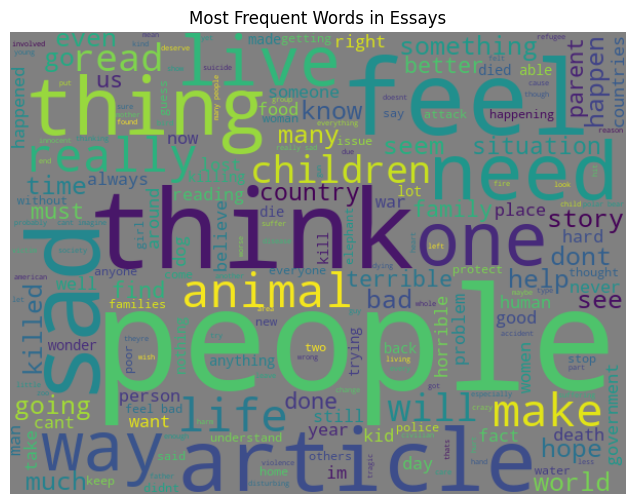

In [20]:
#WordCloud Visualization
text = " ".join(train_df["clean_essay"])
wordcloud = WordCloud(width=600, height=450, background_color="grey").generate(text)

plt.figure(figsize=(11, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Essays")
plt.show()


#### Lemmatization, Tokenization & Stopwords Removal

In [21]:
#defining stopwords
stop_words = set(stopwords.words("english"))

In [22]:
print(len(stop_words))
print(stop_words)

198
{"mightn't", 'once', 'isn', 'such', 'about', 'be', 'it', 'mightn', 'out', 'himself', 'during', "hadn't", "he'll", 'their', 'them', 'me', "weren't", 'than', 'of', 'very', 'our', 'shan', 'those', 'had', 'own', 'does', "they'd", 'been', "don't", 'being', 'did', 'each', 'ourselves', 'above', "haven't", 'or', 'hers', 'over', 'off', 's', 'yours', "that'll", "he's", 'whom', 'other', 'on', 'ain', 'how', "i'll", 'any', "needn't", 'no', 'into', 'he', "hasn't", 'ma', "shouldn't", "it'd", "i've", 'when', "they're", 'against', 'aren', "isn't", 'll', 'have', "wouldn't", 'both', 'under', 'which', 'an', 'her', "it'll", 'in', 'themselves', 'further', 'can', 'so', 'wasn', 've', 'has', 'after', 'why', 'couldn', 'haven', 'now', 'where', 'weren', 'all', 'am', 'herself', 'needn', 'she', "we've", "we'll", "didn't", 'won', 'too', 'hadn', 'not', "mustn't", 'below', 'by', "doesn't", 'having', 'do', 'd', "i'd", "shan't", 'are', "they've", 'your', 'few', "she's", 'from', "you'd", "won't", 'before', 'if', 'who

In [23]:
lemmatizer = WordNetLemmatizer()

In [24]:
# defining preprocessing function to convert to lowercase and to remove urls, punctuation, numbers and extra spaces
def preprocess_text(text):
    text = text.lower() 
    text = re.sub(r'\W', ' ', text) 
    text = re.sub(r'\s+', ' ', text) 
    
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalnum()]  # Lemmatization & stopword removal

    return " ".join(words)

In [25]:
# Ensure 'clean_essay' column exists before applying function
if "clean_essay" not in train_df.columns:
    train_df["clean_essay"] = train_df["essay"]

In [26]:
train_df.head()

,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,iri_personal_distress,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion,text_length,clean_essay,dominant_emotion
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,2,3.429,5,1,train,1,Hope/Sadness,87,it breaks my heart to see people living in tho...,Hope
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,2.857,2.857,2.714,1,train,2,Anger,63,i wonder why there arent more people trying to...,Anger
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,2.0715,4.143,4.643,1,train,4,Sadness,69,after reading the article you cant help but fe...,Sadness
3,6,213,It is so sad that someone who had such an amaz...,6.166667,6.625,16,2,5,1,28,...,4.143,4.857,5,1,train,5,Sadness,67,it is so sad that someone who had such an amaz...,Sadness
4,8,213,"From reading the article, it looks like the wo...",6.833333,1.000,30,1,6,3,37,...,2,3.429,5,1,train,7,Neutral,62,from reading the article it looks like the wor...,Neutral


In [27]:
#adding token lenght
train_df["token_length"] = train_df["clean_essay"].apply(lambda x: len(str(x).split()))
train_df.head()

,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion,text_length,clean_essay,dominant_emotion,token_length
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,3.429,5,1,train,1,Hope/Sadness,87,it breaks my heart to see people living in tho...,Hope,87
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,2.857,2.714,1,train,2,Anger,63,i wonder why there arent more people trying to...,Anger,63
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,4.143,4.643,1,train,4,Sadness,69,after reading the article you cant help but fe...,Sadness,69
3,6,213,It is so sad that someone who had such an amaz...,6.166667,6.625,16,2,5,1,28,...,4.857,5,1,train,5,Sadness,67,it is so sad that someone who had such an amaz...,Sadness,67
4,8,213,"From reading the article, it looks like the wo...",6.833333,1.000,30,1,6,3,37,...,3.429,5,1,train,7,Neutral,62,from reading the article it looks like the wor...,Neutral,62


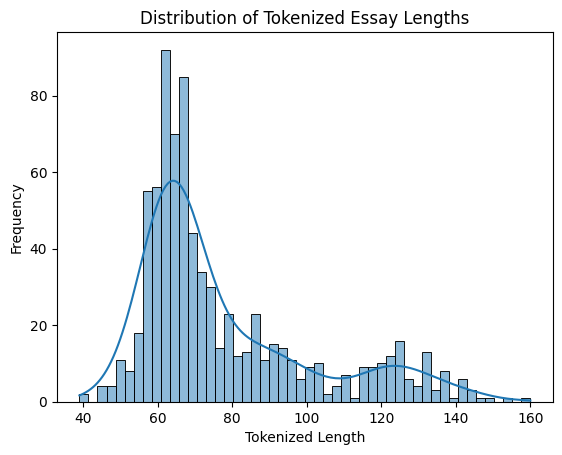

In [28]:
#visual representation of token lenght column
sns.histplot(train_df["token_length"], bins=50, kde=True)
plt.xlabel("Tokenized Length")
plt.ylabel("Frequency")
plt.title("Distribution of Tokenized Essay Lengths")
plt.show()

In [29]:
# applying the preprocessing function to clean_essay 
train_df["clean_essay"] = train_df["clean_essay"].apply(preprocess_text)

In [30]:
train_df['clean_essay']

0      break heart see people living condition hope a...
1      wonder arent people trying help people underst...
2      reading article cant help feel really sad terr...
3      sad someone amazing story died freak accident ...
4      reading article look like world lost kindheart...
                             ...                        
787    feel become national problem soon feel pipe bu...
788    whole situation sketchy wavering ruling death ...
789    death former aide russian president vladimir p...
790    everything russia really freak think country r...
791    whenever russia putin involved trust said stor...
Name: clean_essay, Length: 792, dtype: object

In [32]:
# To show a few examples containing original essay and cleaned essay
for i in range(3):
    print(f"Original: {train_df['essay'].iloc[i]}")
    print(f"Cleaned: {train_df['clean_essay'].iloc[i]}\n")

Original: It breaks my heart to see people living in those conditions. I hope that all the aid that was sent to the island makes it to the people who need it the most. I do not know what I would do it that was my family and I. I would hope that I would do my best, but I can see how depressing and hopeless you could feel having your whole life changed because of a storm and not knowing where your next meal is coming from.
Cleaned: break heart see people living condition hope aid sent island make people need know would family would hope would best see depressing hopeless could feel whole life changed storm knowing next meal coming

Original: I wonder why there aren't more people trying to help these people. I understand Haiti is not the richest nor less corrupt country but surely there must be a way to help. Supplies being looted by crowds is understandable because they are hungry and people need food and water to survive. We must think of other ways to distribute the food and water.
Cle

#### To Convert Text to Numerical Representation (TF-IDF)


In [33]:
# Feature and target variables
X = train_df['clean_essay']  
y = train_df['dominant_emotion']  
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english',
    max_df=0.85,
    min_df=5,
    sublinear_tf=True
)

X = tfidf.fit_transform(train_df['clean_essay'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df['dominant_emotion'])

# Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Define models
from sklearn.naive_bayes import MultinomialNB

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

In [35]:
# Hyperparameter tuning using GridSearchCV
tuned_parameters = {
    'Naive Bayes': {'alpha': [0.1, 0.5, 1.0]},
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
}

In [36]:
from sklearn.model_selection import GridSearchCV

best_models = {}
for model_name, model in models.items():
    print(f'\nTuning {model_name}...')
    grid = GridSearchCV(model, tuned_parameters[model_name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f'Best parameters for {model_name}: {grid.best_params_}')



Tuning Naive Bayes...
Best parameters for Naive Bayes: {'alpha': 0.5}

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 1}

Tuning SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}


In [38]:
# Training models on best parameters and evaluate
results = {}
for model_name, model in best_models.items():
    print(f'\nTraining {model_name}...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc
    print(f'\n{model_name} Accuracy: {acc:.4f}')
    
    # Fixing label inconsistency issue
    unique_labels = np.unique(y_test)
    target_names = [label_encoder.classes_[i] for i in unique_labels]
    
    print(classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names))


Training Naive Bayes...

Naive Bayes Accuracy: 0.5346
              precision    recall  f1-score   support

       Anger       1.00      0.25      0.40        28
     Disgust       1.00      0.08      0.15        12
        Fear       0.00      0.00      0.00         6
        Hope       0.00      0.00      0.00         5
         Joy       0.00      0.00      0.00         1
     Neutral       0.47      0.51      0.49        39
     Sadness       0.53      0.86      0.66        66
    Surprise       0.00      0.00      0.00         2

    accuracy                           0.53       159
   macro avg       0.37      0.21      0.21       159
weighted avg       0.58      0.53      0.47       159


Training Logistic Regression...

Logistic Regression Accuracy: 0.5535
              precision    recall  f1-score   support

       Anger       0.73      0.29      0.41        28
     Disgust       0.00      0.00      0.00        12
        Fear       0.00      0.00      0.00         6
      

In [39]:
# Storing results for model comparison
best_model = max(results, key=results.get)
print(f"\nBest Performing Model: {best_model} with Accuracy: {results[best_model]:.4f}")



Best Performing Model: Random Forest with Accuracy: 0.5597


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# To Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    labels = label_encoder.classes_

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Compute ROC Curves
def plot_roc_curves(models, X_test, y_test):
    y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))
    plt.figure(figsize=(10, 8))

    colors = cycle(["blue", "red", "green", "purple"])
    for (model_name, model), color in zip(models.items(), colors):
        y_score = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)
        
        if y_score.ndim == 1:
            y_score = np.expand_dims(y_score, axis=1)

        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color=color, lw=2, label=f"{model_name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Multi-class Models")
    plt.legend()
    plt.show()

# Histogram of predicted emotions
def plot_histogram(y_pred, model_name):
    labels = label_encoder.classes_
    plt.figure(figsize=(8, 5))
    sns.histplot(y_pred, bins=len(labels), kde=False, color="teal")
    plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=45)
    plt.xlabel("Predicted Emotions")
    plt.ylabel("Frequency")
    plt.title(f"Prediction Distribution - {model_name}")
    plt.show()

# Feature importance for Random Forest
def plot_feature_importance(model, feature_names):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        sorted_idx = np.argsort(importance)[-10:]  # Top 10 features

        plt.figure(figsize=(10, 5))
        plt.barh(range(len(sorted_idx)), importance[sorted_idx], align="center", color="steelblue")
        plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
        plt.xlabel("Feature Importance")
        plt.title("Top 10 Important Features (Random Forest)")
        plt.show()

# Evaluate models and visualize results
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"{model_name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))





Evaluating Naive Bayes...
Naive Bayes Accuracy: 0.5346
              precision    recall  f1-score   support

       Anger       1.00      0.25      0.40        28
     Disgust       1.00      0.08      0.15        12
        Fear       0.00      0.00      0.00         6
        Hope       0.00      0.00      0.00         5
         Joy       0.00      0.00      0.00         1
     Neutral       0.47      0.51      0.49        39
     Sadness       0.53      0.86      0.66        66
    Surprise       0.00      0.00      0.00         2

    accuracy                           0.53       159
   macro avg       0.37      0.21      0.21       159
weighted avg       0.58      0.53      0.47       159


Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.5535
              precision    recall  f1-score   support

       Anger       0.73      0.29      0.41        28
     Disgust       0.00      0.00      0.00        12
        Fear       0.00      0.00      0.00         6
    

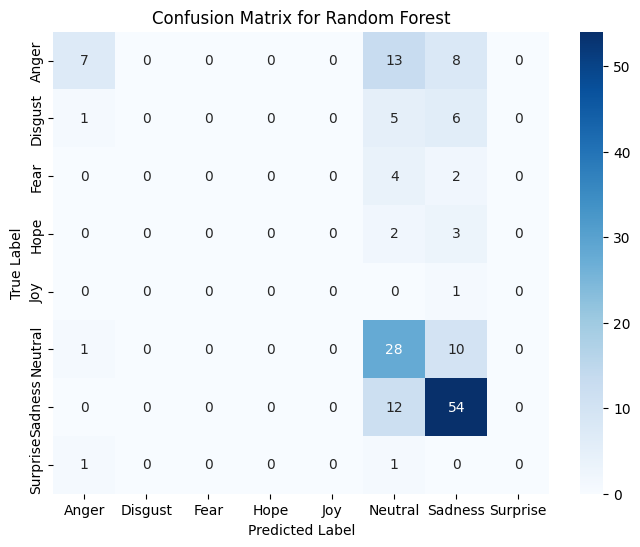

In [50]:
 # Plotting Confusion Matrix
plot_confusion_matrix(y_test, y_pred, model_name)

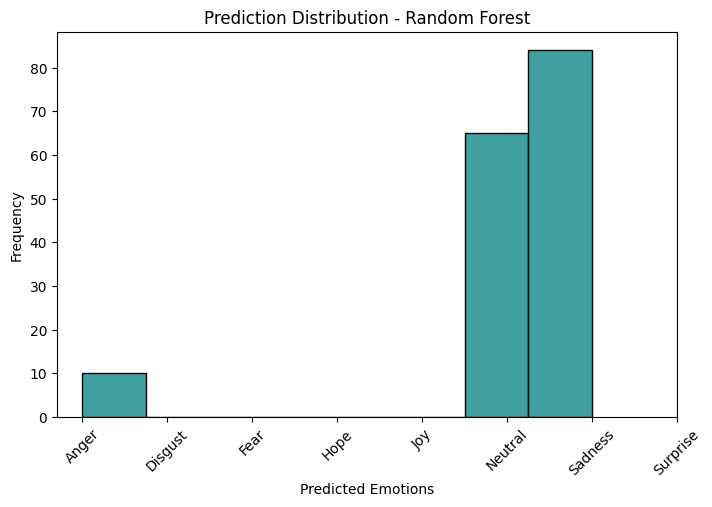

In [48]:
# Histogram of predictions
plot_histogram(y_pred, model_name)

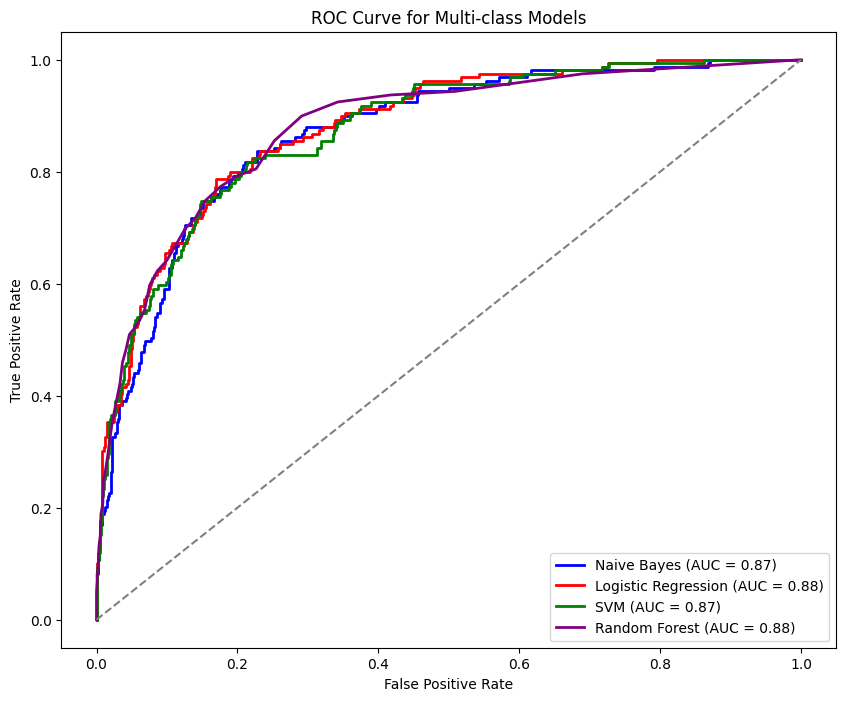

In [45]:
# Plotting ROC Curves
plot_roc_curves(best_models, X_test, y_test)

##### The ROC curve plots the True Positive Rate (TPR) on the y-axis and the False Positive Rate (FPR) on the x-axis. True Positive Rate (TPR): Also known as sensitivity or recall, it measures the proportion of actual positives correctly identified by the model: 𝑇PR = True Positives + False Negatives/True Positives. while, False Positive Rate (FPR): Measures the proportion of actual negatives incorectly identified as positives by the model: FPR = False Positives + True Negatives/False Positives As the plotted ROC curve steepens and moves towards the top-left corner, it indicates: A higher TPR (better recall/sensitivity), meaning the model is correctly identifying more positive instances. A lower FPR (better specificity), meaning the model is minimizing the number of false positives. A high AUC (Area Under the Curve), which approaches 1, indicates that the model has a good ability to distinguish between the classes. The steeper the curve towards the top-left, the better the model's classification performance.

In [53]:
# Storing results for model comparison
best_model = max(results, key=results.get)
print(f"\nBest Performing Model: {best_model} with Accuracy: {results[best_model]:.4f}")



Best Performing Model: Random Forest with Accuracy: 0.5597


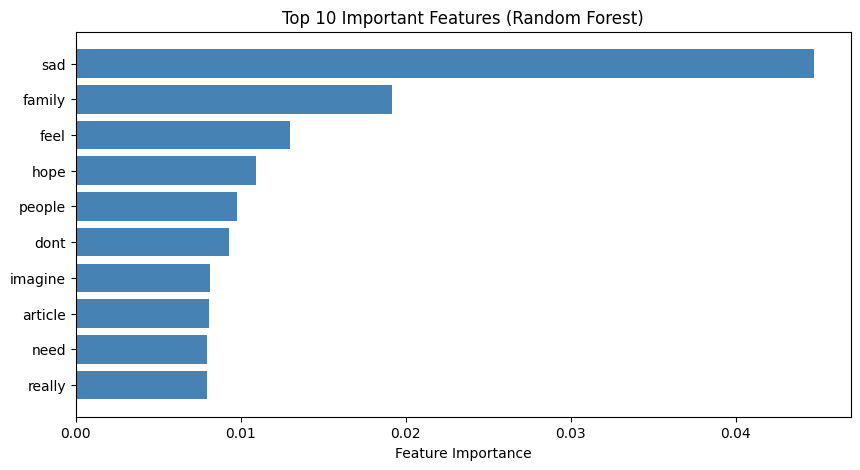

In [54]:
# Visualizing feature Importance for Random Forest
if "Random Forest" in best_models:
    plot_feature_importance(best_models["Random Forest"], tfidf.get_feature_names_out())

In [44]:


# Preprocess the text data in the test set
test_df['clean_essay'] = test_df['essay'].apply(preprocess_text)

test_df.head()

,conversation_id,article_id,essay,speaker_id,gender,education,race,age,income,speaker_number,split,essay_id,clean_essay
0,1192,6,"hi my dear friend, how r you?. Are you use...",45,2,6,1,25,50000,2,test,0,hi dear friend r used mobile phone facility pa...
1,1192,6,The loss of human life is always a tragic even...,65,1,6,1,34,30000,1,test,1,loss human life always tragic event death amer...
2,1059,6,"Hello mate, it's been a long time since I met ...",53,2,6,1,64,40000,2,test,2,hello mate long time since met hope well sendi...
3,1059,6,us America and the security council adopts res...,92,2,6,1,35,5000,1,test,3,u america security council adopts resolution 1...
4,1060,6,My thought was NATO and government forces are ...,47,2,7,1,34,75000,1,test,4,thought nato government force increasingly res...
